In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [66]:
X1 = np.random.randn(100).reshape(-1,1)
X2 = np.random.randn(100).reshape(-1,1)
e = np.random.normal(0, 2, size=100).reshape(-1,1)
Y = -12 + 35 * X1 - 23 * X2 + e

In [67]:
beta_1 = 1

In [68]:
Y_B1X1 = Y - beta_1 * X1

In [69]:
lm_1 = LinearRegression().fit(X2, Y_B1X1)
beta_2 = lm_1.coef_[0][0]
lm_1.intercept_[0]

-8.734602166066109

In [70]:
beta_0 = []
beta_1 = [1]
beta_2 = []

for i in range(100):
    Y_X1 = Y - beta_1[i] * X1
    lm_1 = LinearRegression().fit(X2, Y_X1)
    beta_2.append(lm_1.coef_[0][0])

    Y_X2 = Y - beta_2[i] * X2
    lm_2 = LinearRegression().fit(X1, Y_X2)
    beta_1.append(lm_2.coef_[0][0])
    beta_0.append(lm_2.intercept_[0])

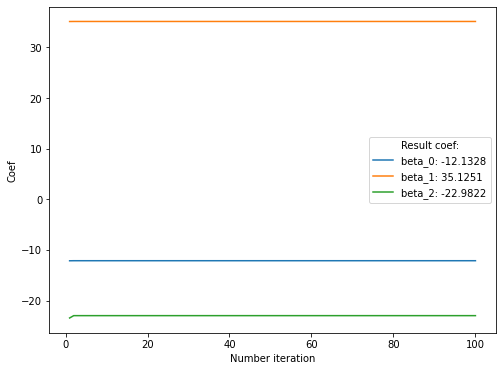

In [72]:
plt.figure(figsize=(8,6))
plt.plot([], [], color='white', label='Result coef:')
plt.plot(np.arange(1,101), beta_0,     label='beta_0: {:.4f}'.format(beta_0[-1]))
plt.plot(np.arange(1,101), beta_1[1:], label='beta_1: {:.4f}'.format(beta_1[-1]))
plt.plot(np.arange(1,101), beta_2,     label='beta_2: {:.4f}'.format(beta_2[-1]))
plt.xlabel('Number iteration')
plt.ylabel('Coef')
plt.legend()
plt.show()

In [73]:
lm = sm.OLS(Y, sm.add_constant(np.concatenate((X1, X2), axis=1))).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.655e+04
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          1.21e-123
Time:                        23:26:17   Log-Likelihood:                -207.10
No. Observations:                 100   AIC:                             420.2
Df Residuals:                      97   BIC:                             428.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1328      0.197    -61.723      0.0

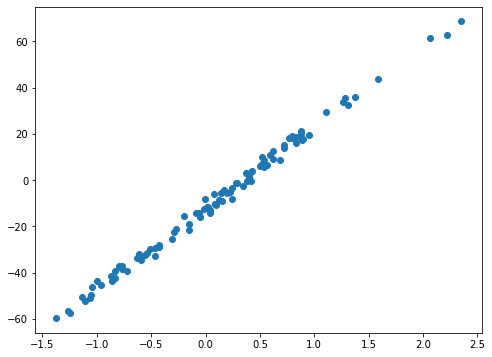

In [77]:
plt.figure(figsize=(8,6))
plt.scatter(X1, Y - beta_2[-1]*X2)
plt.show()